In [130]:
import networkx as nx
import pandas as pd

import nltk, string, urllib
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

import string
punctuation = list(string.punctuation)

import matplotlib.pyplot as plt

update_nltk = False

if update_nltk:
    nltk.download()

In [270]:
def get_tokens():

    url = "http://www.gutenberg.org/files/1342/1342-0.txt"
    text = urllib.request.urlopen(url).read().decode()

    replacements = ['\ufeff', '\r', '\n', '”', '“', '_', '—']

    tokens = []

    for r in replacements:
        text = text.replace(r, ' ')

    for i in range(5):
        text = text.replace('  ', ' ')

    text = text[1608:]
    text = text.lower()

    sentences = sent_tokenize(text)

    for s in sentences:
        row_tokens = [token for token in word_tokenize(s) if token not in punctuation]
        tokens.append(row_tokens)

    return tokens

In [271]:
def get_network_df(token_rows, debug=False):

    sources = []
    targets = []
    
    if debug == True:
        token_rows = token_rows[0:10]

    for row in token_rows:

        max_i = len(row)
        for i in range(max_i):        
            if i <= max_i - 2:
                source = row[i]
                target = row[i+1]

                if debug == True:
                    print('{} -> {}'.format(source, target))

                sources.append(source)
                targets.append(target)

    network_df = pd.DataFrame({'source':sources, 'target':targets})
    
    return network_df

In [272]:
def get_degree_df(G):

    degree_df = pd.DataFrame(G.degree())
    degree_df.columns = ['word', 'degrees']
    degree_df.set_index('word', inplace=True)
    degree_df.sort_values('degrees', inplace=True)
    
    return degree_df

In [273]:
def get_dict_degree_nodes(degree_df, min_word_size=3):

    dict_degree_nodes = {}

    for d in degree_df['degrees'].unique():
        words = list(degree_df[degree_df['degrees']==d].index)
        words = sorted([word for word in words if len(word)>min_word_size])
        words = [word for word in words if word.isalnum()]
        dict_degree_nodes[d] = words
        
    return dict_degree_nodes

In [274]:
def print_words_by_degrees(dict_degree_nodes):

    for i in dict_degree_nodes.keys():

        words = dict_degree_nodes[i]

        if len(words) > 0:
            print('{} - {}'.format(i, words))
            print()

In [275]:
token_rows = get_tokens()
network_df = get_network_df(token_rows)
network_df.head()

,source,target
0,it,is
1,is,a
2,a,truth
3,truth,universally
4,universally,acknowledged


In [276]:
token_rows[0]

['it',
 'is',
 'a',
 'truth',
 'universally',
 'acknowledged',
 'that',
 'a',
 'single',
 'man',
 'in',
 'possession',
 'of',
 'a',
 'good',
 'fortune',
 'must',
 'be',
 'in',
 'want',
 'of',
 'a',
 'wife']

In [277]:
# it needs to be a directed graph if we want to analyze directional usage
G = nx.from_pandas_edgelist(network_df, create_using=nx.DiGraph())

In [278]:
degree_df = get_degree_df(G)
degree_df.head()

,degrees
word,
graceful,1
prompted,1
housemaids,1
possesses,1
physicians,1


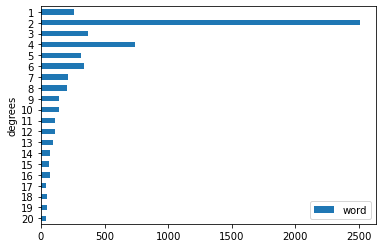

In [279]:
degree_df.reset_index().groupby('degrees').count().sort_index()[0:20].plot.barh()
plt.gca().invert_yaxis()

In [280]:
dict_degree_nodes = get_dict_degree_nodes(degree_df)

print_words_by_degrees(dict_degree_nodes)

1 - ['acquiesce', 'acquire', 'admittance', 'afflicted', 'afresh', 'agonies', 'alas', 'annoyed', 'annum', 'apace', 'apparel', 'arriving', 'attitude', 'aunts', 'avenue', 'backwards', 'bandbox', 'bills', 'blowsy', 'brains', 'bromley', 'captivation', 'celerity', 'chagrin', 'charges', 'chatty', 'chicken', 'circles', 'circumspect', 'clouded', 'clump', 'coarse', 'coherent', 'colds', 'complaining', 'concurrence', 'constancy', 'construed', 'contradicted', 'contrariwise', 'controverted', 'correspondents', 'corroboration', 'couples', 'courteous', 'creditably', 'criticise', 'cucumber', 'curtains', 'definition', 'desert', 'despair', 'despicable', 'despite', 'develop', 'disagreeably', 'discernible', 'disclosure', 'discontinuance', 'disgraced', 'dispense', 'disposal', 'disputable', 'disputes', 'disregarded', 'dissipation', 'dissolved', 'doubled', 'doubtingly', 'dresses', 'duel', 'earth', 'edition', 'endure', 'energetic', 'enjoyments', 'ensign', 'epithet', 'exhibit', 'explicitly', 'exquisite', 'exuber

In [281]:
dict_degree_nodes[1]

['acquiesce',
 'acquire',
 'admittance',
 'afflicted',
 'afresh',
 'agonies',
 'alas',
 'annoyed',
 'annum',
 'apace',
 'apparel',
 'arriving',
 'attitude',
 'aunts',
 'avenue',
 'backwards',
 'bandbox',
 'bills',
 'blowsy',
 'brains',
 'bromley',
 'captivation',
 'celerity',
 'chagrin',
 'charges',
 'chatty',
 'chicken',
 'circles',
 'circumspect',
 'clouded',
 'clump',
 'coarse',
 'coherent',
 'colds',
 'complaining',
 'concurrence',
 'constancy',
 'construed',
 'contradicted',
 'contrariwise',
 'controverted',
 'correspondents',
 'corroboration',
 'couples',
 'courteous',
 'creditably',
 'criticise',
 'cucumber',
 'curtains',
 'definition',
 'desert',
 'despair',
 'despicable',
 'despite',
 'develop',
 'disagreeably',
 'discernible',
 'disclosure',
 'discontinuance',
 'disgraced',
 'dispense',
 'disposal',
 'disputable',
 'disputes',
 'disregarded',
 'dissipation',
 'dissolved',
 'doubled',
 'doubtingly',
 'dresses',
 'duel',
 'earth',
 'edition',
 'endure',
 'energetic',
 'enjoymen